In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.rcParams.update({'font.size': 10.5})

In [2]:
pal = sns.color_palette(palette='icefire')
pal_energy = pal[1]
pal_runtime = pal[5]

In [3]:
def plot(df):
    fig = plt.figure(figsize=(6.5, 5))

    x = df.index
    
    ax = sns.lineplot(x=x, y=df['optimum'], label='Optimal thread-count', color=pal_runtime, linestyle='--')
    sns.lineplot(x=x, y=df['threads'], label='Actual thread-count', color=pal_energy, linewidth=2, ax=ax)

    xticks = list(range(125, len(df), 250))
    xlabels = [f'{df['size'][x]}x{df['size'][x]}' for x in xticks]
    ax.set_xticks(xticks, labels=xlabels)

    ax.set_xlabel('Matrix size during program runtime')
    ax.set_ylabel('#Threads')
    ax.set_ylim((0,17))
    fig.tight_layout()
    
    dist = (round(df['threads']) - df['optimum']).abs()
    print(f'Average distance from optimum: {dist.sum() / len(dist):.2f}')

    return (fig, ax)

Average distance from optimum: 0.63


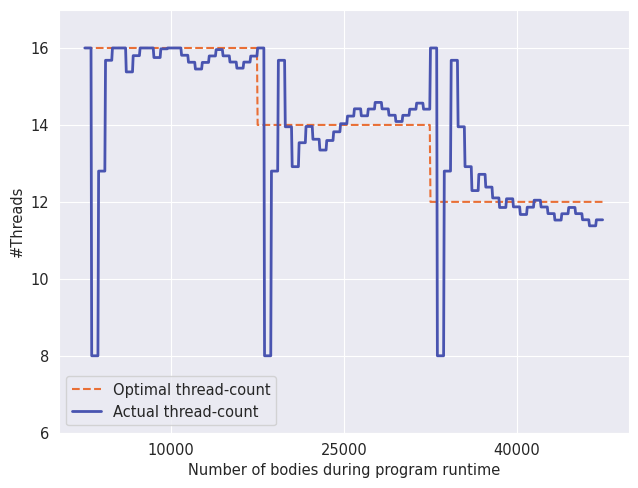

In [4]:
df = pd.read_csv('data/adapt_nbody.csv')
def optimum(row):
    match row['size']:
        case 10000: return 16
        case 25000: return 14
        case 40000: return 12
df['optimum'] = df.apply(optimum, axis=1)

fig, ax = plot(df)
ax.set_ylim((6,17))

xticks = list(range(125, len(df), 250))
xlabels = [f'{df['size'][x]}' for x in xticks]
ax.set_xticks(xticks, labels=xlabels)
ax.set_xlabel('Number of bodies during program runtime')

fig.savefig('images/adapt_nbody.png', bbox_inches='tight', dpi=300)
plt.show()

Average distance from optimum: 1.20


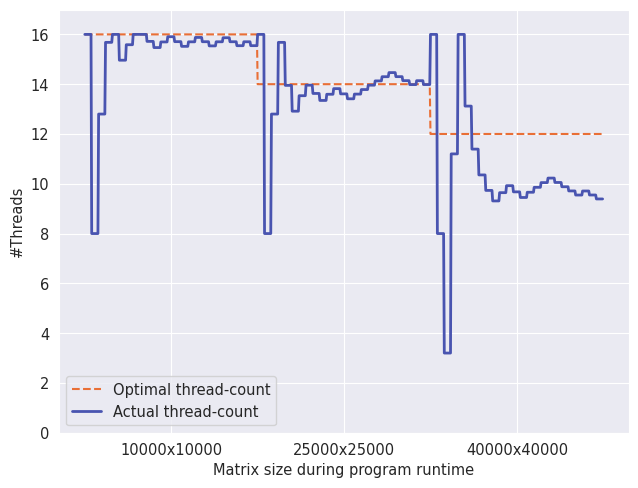

In [5]:
df = pd.read_csv('data/adapt_stencil.csv')
def optimum(row):
    match row['size']:
        case 10000: return 16
        case 25000: return 14
        case 40000: return 12
df['optimum'] = df.apply(optimum, axis=1)

fig, ax = plot(df)
fig.savefig('images/adapt_stencil.png', bbox_inches='tight', dpi=300)
plt.show()

Average distance from optimum: 2.75


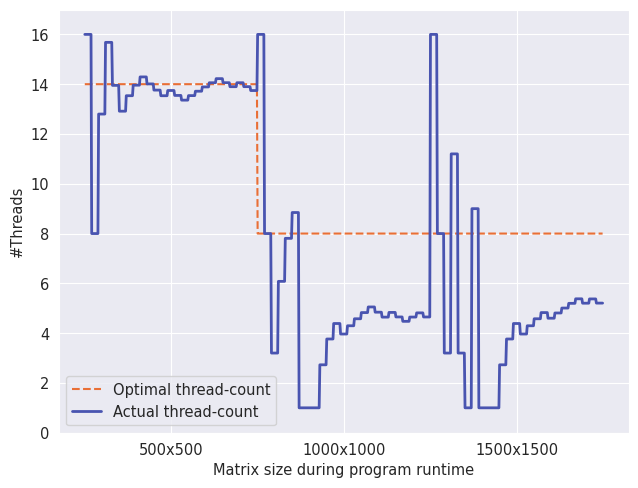

In [6]:
df = pd.read_csv('data/adapt_matmul.csv')
def optimum(row):
    match row['size']:
        case 500: return 14
        case 1000: return 8
        case 1500: return 8
df['optimum'] = df.apply(optimum, axis=1)

fig, ax = plot(df)
fig.savefig('images/adapt_matmul.png', bbox_inches='tight', dpi=300)
plt.show()

Average distance from optimum: 1.14


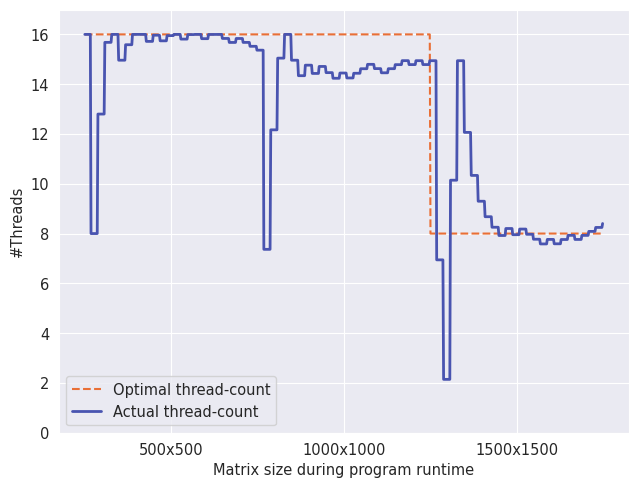

In [7]:
df = pd.read_csv('data/adapt_rust.csv')
def optimum(row):
    match row['size']:
        case 1500: return 8
        case _: return 16
df['optimum'] = df.apply(optimum, axis=1)

fig, ax = plot(df)
fig.savefig('images/adapt_rust.png', bbox_inches='tight', dpi=300)
plt.show()